# Métricas

## Matriz de confusión

Matriz de confusión sin normalizar
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Matriz de confusión normalizada
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.   1.  ]]


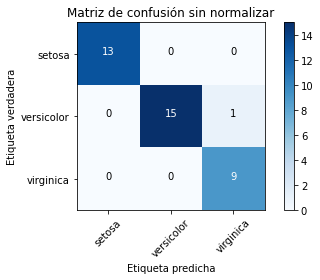

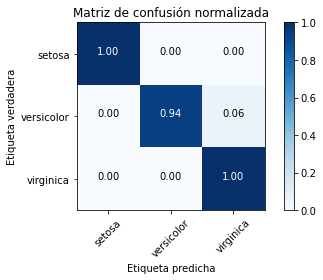

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 

# Importamos dataset iris de scikitlearn
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Dividimos en train test el conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Corremos un clasificador
classifier = DecisionTreeClassifier()
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función de scikit-learn imprime y plotea 
    la matriz de confusión pasada por parámetro. 
    Si se le pasa por parámetro 
    `normalize=True`, se le aplicará una normalización.

    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta predicha')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matriz de confusión sin normalizar')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de confusión normalizada')

plt.show()

## GridSearch 

In [13]:
from sklearn.datasets import load_boston

# Viviendas de Boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                                    boston.target,
                                                    test_size=0.25,
                                                    random_state=33)

In [15]:
from sklearn.model_selection import GridSearchCV # Iteramos haciendo CrossValidation
from sklearn.tree import DecisionTreeRegressor
param_grid = [
    {'max_depth': [2, 3, 4], 'max_features': [2, 4, 6, 8]},
]


In [20]:
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [2, 3, 4],
                          'max_features': [2, 4, 6, 8]}],
             return_train_score=True, scoring='neg_mean_squared_error')

## Propiedades de GridSearch

In [21]:
grid_search.best_params_

{'max_depth': 4, 'max_features': 6}

In [22]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=4, max_features=6)

In [25]:
grid_search.cv_results_['mean_train_score']

array([-54.44, -29.84, -31.67, -28.75, -26.64, -31.71, -21.  , -20.01,
       -31.47, -15.02, -12.22, -12.22])

In [27]:
np.sqrt(-grid_search.cv_results_['mean_train_score'])

array([7.38, 5.46, 5.63, 5.36, 5.16, 5.63, 4.58, 4.47, 5.61, 3.88, 3.5 ,
       3.5 ])

In [28]:
np.sqrt(-grid_search.cv_results_['mean_test_score'])

array([8.04, 6.36, 6.23, 6.1 , 6.03, 6.28, 5.88, 5.23, 6.58, 4.79, 4.67,
       4.85])

## RandomizedSearch

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_grid = {'max_depth': sp_randint(2, 4), 'max_features': sp_randint(2, 8)}


In [30]:
tree_reg = DecisionTreeRegressor()
rand_search = RandomizedSearchCV(tree_reg, param_distributions=param_grid, cv=5,
                                 scoring='neg_mean_squared_error',
                                 n_iter=10,
                                 return_train_score=True)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019C0D94B4C0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019C125ECF70>},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [31]:
rand_search.best_params_

{'max_depth': 3, 'max_features': 7}

In [32]:
rand_search.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features=7)

In [33]:
np.sqrt(-rand_search.cv_results_['mean_train_score'])

array([6.31, 4.62, 4.38, 6.01, 5.36, 5.12, 5.52, 6.69, 6.37, 6.06])

In [34]:
np.sqrt(-rand_search.cv_results_['mean_test_score'])

array([7.38, 5.39, 5.26, 6.82, 6.63, 6.27, 6.01, 6.44, 6.93, 6.23])

In [35]:
# Comparamos los resultados entre Randomizedsearch y GridSearch
print("Promedio GridSearch RMSE: ", np.sqrt(-grid_search.cv_results_['mean_test_score']).mean())
print("Promedio RandomizedSearch RMSE: ", np.sqrt(-rand_search.cv_results_['mean_test_score']).mean())

Promedio GridSearch RMSE:  5.919943752095794
Promedio RandomizedSearch RMSE:  6.336922044629828


## Cambiando el scoring en GridSearch

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = [
    {'max_depth': [2, 3, 4], 'max_features': [2, 4, 6, 8]},
]
tree_reg = DecisionTreeRegressor()
grid_search_r2 = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='r2', return_train_score=True)
grid_search_r2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [2, 3, 4],
                          'max_features': [2, 4, 6, 8]}],
             return_train_score=True, scoring='r2')

## Evaluación en test set

In [37]:
y_pred = grid_search.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.336587508872849

In [40]:
y_pred = rand_search.predict(X_test)

In [41]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.06037565016364

In [42]:
y_pred = grid_search_r2.predict(X_test)

In [43]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.586974961721879

## Oversampling 

Ejemplo extra de oversample

Automatically created module for IPython interactive environment


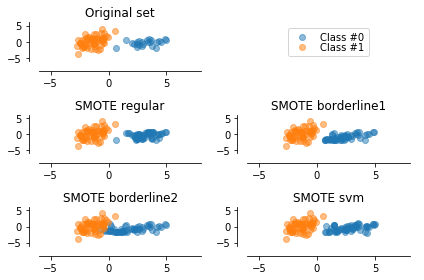

In [25]:
# Authors: Fernando Nogueira
#          Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1


# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.3, 0.7],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=80, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply regular SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')
for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)
plt.tight_layout()
plt.show()